# Assignment #2
Anita Restrepo

## Question 1

What kind of language does the popular sitcom "Friends" use to refer to body image and to what extent are different language patterns conventionalized as legisigns?

## Question 2

To answer this question, I will be looking at snippets from the script of the TV show obtained through a generous soul on data.world. I was able to download en excel file with this data straight from data.world. Very kind soul indeed.

## Question 3

In [5]:
import pandas as pd # import Pandas
import re # import re package to look at text analysis

In [3]:
df = pd.read_excel('Friends_Script.xlsx') #read excel file in as pandas dataframe
df.head() # print out the first five lines

,~~Output Dialog~~,~~Respect of User (OD)~~,~~Input Dialog~~
0,Top of the world? Dock of the bay? I'm out.,5,What am I sitting on?
1,"Oh! Look at that, time's up! My turn!",7,I can't believe we've never done this before!...
2,"Wow! Listen, we had a good run. What was it?...",6,"Chandler!!! Chandler!!! Chandler, I saw what..."
3,Hey!,8,Hey!
4,Okay.,5,"Okay, pick a card."


## Question 4

In [4]:
# clean data
df.columns = ["A", "B", "C"]  # relabel columns of dataframe for more convenience
data1 = pd.Series(df["A"]) # pull out the two columns I am interested in separately
data2 = pd.Series(df["C"])
data = data1.append(data2, ignore_index = True) # append second column to end of first in the form of a pandas series and ignore the index so it creates new index with correct length
# lower case everything
data = [str.lower(item) for item in data] # use comprehensive list
data = pd.Series(data) # turn back into a Series

In [7]:
# create a list of common body image-related terms to look for in the script
words = ["hottie", "sexy", "exercis", "waist", "busty", "fat ", "fatso ", 
         "fatty", "big boned", "big-boned", "flab", "binge", " pig ", "piggy", 
         "pig out", "lard ", "chunky", "weight", "skinny", " thin ", "healthy",
         "athletic", "saggy", "anorexic", "skeletal", "bag of bones", "diet"]

In choosing the selected words, I looked for common body image words and phrases online. I tried to hit a sweet spot (through trial and error) where the words would be specific enough to minimize the potential for them being used outside of a body image context but also sufficiently sensitive to pick up on as much signal as possible. For this reason, words like "big" did not make it into the list, though there were various entries where "big" was used in a body image related context (science is hard). Additionally, I added spaces before and/or after some of the words in order to make sure the individual words were being matched, as opposed to the combination of letters inside other words (this was especially common for short words like "fat" and "pig"). Finally, I included "exercis" as opposed to "exercise" as a quick and dirty way to get at the lemma of this term.

In [8]:
# create a list of compiled patterns to search for the words in "words"
patterns = [re.compile(x) for x in words]

In [9]:
# create function that searches for each of the patterns and returns a ghost list with all the strings where it found at least one of the patterns
ghost = []
def ghastly(string): # trying to hang on to that Halloween cheer
    for i in patterns:
        if i.search(string) != None:
            ghost.append(string)

In [10]:
#apply the function to the full data
data.apply(ghastly)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
15224    None
15225    None
15226    None
15227    None
15228    None
15229    None
15230    None
15231    None
15232    None
15233    None
15234    None
15235    None
15236    None
15237    None
15238    None
15239    None
15240    None
15241    None
15242    None
15243    None
15244    None
15245    None
15246    None
15247    None
15248    None
15249    None
15250    None
15251    None
15252    None
15253    None
Length: 15254, dtype: object

In [20]:
# visually inspect the resulting ghost list to make sure most matches are actually body image-related
ghost[10:20]
ghost[20:30]
ghost[50:53]
ghost[:5]

[' ahh, hotties of the paleontology department, there\x92s a big selling calendar, eh? ',
 " woah, woah, i've put on a little weight? ",
 ' well, we\'re talking about sperm donors and zack may be the guy! i mean, look, he\'s intelligent, he\'s healthy, he\'s athletic, i mean, he is "spermtastic"! ',
 ' well, we\'re talking about sperm donors and zack may be the guy! i mean, look, he\'s intelligent, he\'s healthy, he\'s athletic, i mean, he is "spermtastic"! ',
 ' ah, you\x92re still just a little fat girl inside aren\x92t you?  ']

In [25]:
# remove duplicate entries
ghost = list(dict.fromkeys(ghost))
ghost[:5] # check to make sure it worked

[' ahh, hotties of the paleontology department, there\x92s a big selling calendar, eh? ',
 " woah, woah, i've put on a little weight? ",
 ' well, we\'re talking about sperm donors and zack may be the guy! i mean, look, he\'s intelligent, he\'s healthy, he\'s athletic, i mean, he is "spermtastic"! ',
 ' ah, you\x92re still just a little fat girl inside aren\x92t you?  ',
 ' nah, monica\x92s watching some cooking show. come on, i don\x92t want to miss when they were skinny. ']

In [26]:
match = [re.search(pattern, string) for pattern in patterns for string in ghost] # create a "match" list that goes through each item in ghost and returns the match object found 
matched_words = [i.group(0) for i in match if i != None] # if there is a match object, return the actual word that was matched
matched_words

['hottie',
 'hottie',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'waist',
 'waist',
 'waist',
 'waist',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fatty',
 'flab',
 ' pig ',
 'piggy',
 'piggy',
 'chunky',
 'weight',
 'weight',
 'weight',
 'weight',
 'weight',
 'skinny',
 'skinny',
 ' thin ',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'athletic',
 'saggy',
 'diet',
 'diet',
 'diet']

In [27]:
# create tally_df with a count of how many times each word in words was matched in ghost
tally_df = pd.DataFrame({"Word": i, "Count": matched_words.count(i)} for i in words)
tally_df

,Count,Word
0,2,hottie
1,11,sexy
2,0,exercis
3,4,waist
4,0,busty
5,11,fat
6,0,fatso
7,1,fatty
8,0,big boned
9,0,big-boned


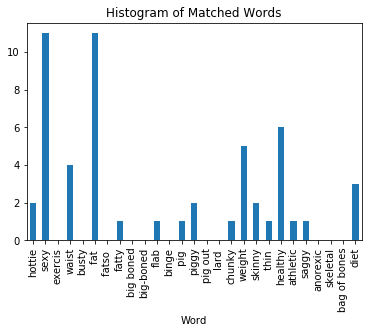

In [29]:
# plot a histogram of each of the matched words
tally_df.plot.bar(x = "Word", y = "Count", title = "Histogram of Matched Words", legend = False);

When looking at the frequency of use of certain body image-related words (hottie, sexy, exercise, waist, busty, fat, fatso, fatty, big boned, big-boned, flab, binge, pig, piggy, pig out, lard, chunky, weight, skinny, thin, healthy, athletic, saggy, anorexic, skeletal, bag of bones, diet), it seems that five separate groups come out. The most used words are “sexy” and “fat”; the second most used are “weight” and “healthy”; the third most used are “waist” and “diet”; the fourth most used are “hottie”, “piggy”, and “skinny”; and the fifth most used are “fatty”, “flab”, “pig”, “chunky”, “thin”, “athletic” and “saggy”. 

From this preliminary exploratory study, certain patterns seem to be emerging. The most used words could be conceived as two opposing ends of a spectrum of sexual desire, possibly hinting at the fact that the term “fat” is being conventionalized as a legisign for a sexually undesirable, negative body image. This may seem obvious to a western culture, but is not necessarily true for other cultures with different beauty standards. 

The second and third groups taken together could possibly index a preoccupation with achieving beauty standards and “ideal” body weight, though it is hard to tell what the conventionalized “ideal” body image might be. The fact that the word “healthy” is in the second group provides some hope, in that the goal of the seeming concern with “diet” and “weight” might be to be healthy and not so much to achieve externally imposed beauty standards. Nonetheless, we must consider a potential confound that is present with all the words chosen for the analysis but perhaps more so for “healthy”: the context of use may not be body image-related, even though the words were chosen for their particular specificity. Additionally, the preponderance of “diet” over “exercis” (which did not come up at all) may be conveying the cultural idea that it is more appropriate to limit eating instead of increasing exercise in the pursuit of the “athletic” body image (which came up in the fifth group). This might also be considered evidence against the theory that the frequency of “healthy” is indexing a quest for health as opposed to beauty images since exercise is a generally healthier way of achieving weight loss than dieting. 

In conclusion, the current preliminary analysis of word frequency may hint at the conventionalization of two cultural phenomena: body image portrayed on a sexual desirability spectrum and the preoccupation with taking steps to achieve an “ideal” body image, particularly in the form of dieting over exercise.

## Question 5

Now that I have explored the frequency of use of different body image-related words in a subset of the script of "Friends", there are multiple other analyses that would help to more narrowly identify the trends seen in the data above. First, I will do some web scraping from a website (https://fangj.github.io/friends/) that has compiled the full "Friends" script by episode and identifies the speakers as well as the stage instructions. The fact that it follows a very consistent script structure where the speakers are bolded followed by colons and the stage instructions are surrounded by brackets will make it easy to ask python to parse out the different components. I also think the list of body image-related words needs to be expanded to include words that are more commonly used to refer to the male body as well as words that can be considered neutral (though they are scarily hard to find – I guess we only talk about body image if it’s very good or very bad!). Once this is done, I would like to analyze frequency of word use based on valence (positive vs. negative vs. neutral words). While not providing a very fine-grained view of the legisigns involved, this would allow me to determine the overall tendency towards positive vs. negatively valenced language. Additionally, I am eager to analyze whether certain subsets of words are differentially used by male or female speakers, thus potentially conventionalizing the cultural norm that males and females should speak about the body in different ways. Finally, since "Friends" ran for ten consecutive years (1994-2004), looking at the temporal change in frequency of use of different words would serve as a proxy for understanding how these cultural patterns changed in that timespan. These follow-up analyses will allow me to more specifically identify how the kind of language that is being used in reference to body image in the show is being conventionalized into different cultural patterns both within the show, and through its viewers, potentially in the real world.